# Craft a Story From a Dataset

In this notebook, I will use a dataset from Kaggle to tell a story.  I chose a dataset concerning Starbucks nutrition, found here: https://www.kaggle.com/datasets/starbucks/starbucks-menu?resource=download

There are a few questions I will aim to answer with this dataset.

* What variety in drinks does Starbucks have?
* Which drinks have the highest calories?
* Which beverage category is more caloric?
* Which beverage category has more caffeine?
* Is there a relationship between calories and caffeine?
* What type of drink has more trans fat?
* Is there a relationship between calories and trans fat?
* What type of drink has more sugar?
* Is there a relationship between calories and sugar?

My hypothesis is that there is a positive correlation between calories and trans fat, but not calories and caffeine.  My hope is that this exploration of the dataset will answer the above questions and help to settle my hypothesis.

## 1. Table of Contents

[1. Table of Contents](#1.-Table-of-Contents)

[2. Import Packages](#2.-Import-Packages)

[3. Import Data](#3.-Load-Data)

[4. Explore the Data](#4.-Explore-the-Data)

[5. Conclusion](#5.-Conclusion)

## 2. Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 3. Import Data

In [2]:
starbucks_data = pd.read_csv('/Users/lauren/Desktop/starbucks_drinkMenu_expanded.csv')

## 4. Explore the Data

In [3]:
#Call the info method on starbucks_data to see a summary of the data
starbucks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [4]:
#Call the head method on starbucks_data to print the first several rows of the data
starbucks_data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0


In [5]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#starbucks_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([starbucks_data.isnull().sum(), 100 * starbucks_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
Caffeine (mg),23,9.504132
Beverage,0,0.000000
Iron (% DV),0,0.000000
Calcium (% DV),0,0.000000
Vitamin C (% DV),0,0.000000
Vitamin A (% DV),0,0.000000
Protein (g),0,0.000000
Sugars (g),0,0.000000
Dietary Fibre (g),0,0.000000
Beverage_category,0,0.000000


Based on the above, we can see that we have missing values in the Caffeine (mg) column.

In [6]:
# I want to confirm the number of unique data we have per Beverage category.
# I will use the `nunique` method

starbucks_data[['Beverage_category']].nunique()

Beverage_category    9
dtype: int64

In [7]:
starbucks_data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [8]:
# I want to confirm the number of unique data we have per Beverage.
# I will use the `nunique` method

starbucks_data[['Beverage']].nunique()

Beverage    33
dtype: int64

So there are 9 separate beverage categories and 33 total unique beverages.

In [9]:
starbucks_data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [10]:
starbucks_data['Beverage'].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [11]:
#remae the similar coffee under same category
starbucks_data['Beverage_category'] = starbucks_data['Beverage_category'].replace({'Frappuccino® Blended Coffee':'Frappuccinos'})
starbucks_data['Beverage_category'] = starbucks_data['Beverage_category'].replace({'Frappuccino® Light Blended Coffee':'Frappuccinos'})
starbucks_data['Beverage_category'] = starbucks_data['Beverage_category'].replace({'Frappuccino® Blended Crème':'Frappuccinos'})
starbucks_data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0


In [12]:
starbucks_data[['Beverage_category']].nunique()

Beverage_category    7
dtype: int64

In [13]:
starbucks_data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccinos'], dtype=object)

Since we know that we have missing values in our dataset, we're going to replace the missing values with the mean of the column:

In [14]:
starbucks_data = starbucks_data.dropna()

In [18]:
missing = pd.concat([starbucks_data.isnull().sum(), 100 * starbucks_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
Beverage_category,0,0.0
Beverage,0,0.0
Iron (% DV),0,0.0
Calcium (% DV),0,0.0
Vitamin C (% DV),0,0.0
Vitamin A (% DV),0,0.0
Protein (g),0,0.0
Sugars (g),0,0.0
Dietary Fibre (g),0,0.0
Cholesterol (mg),0,0.0


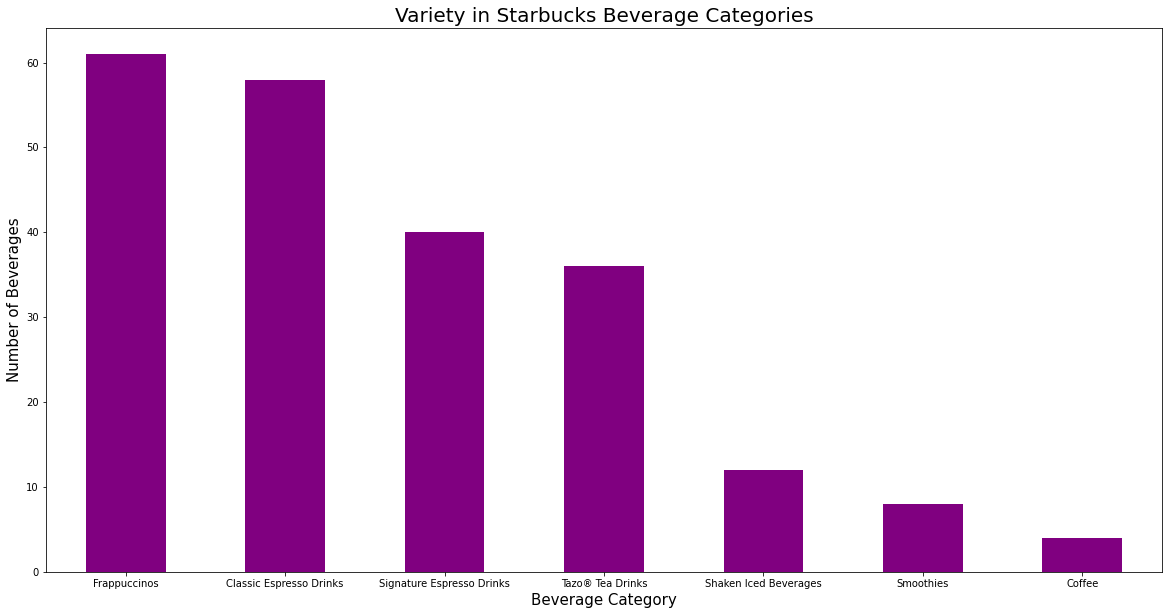

In [19]:
starbucks_data['Beverage_category'].value_counts().plot(kind='bar', figsize=(20, 10), rot=0, color='purple')
plt.title('Variety in Starbucks Beverage Categories', fontsize=20)
plt.xlabel("Beverage Category", fontsize = 15)
plt.ylabel("Number of Beverages", fontsize = 15)
plt.show()

In [20]:
starbucks_data.nlargest(5, 'Calories')[['Beverage', 'Calories']]

,Beverage,Calories
84,White Chocolate Mocha (Without Whipped Cream),510
85,White Chocolate Mocha (Without Whipped Cream),460
215,Java Chip (Without Whipped Cream),460
83,White Chocolate Mocha (Without Whipped Cream),450
128,Tazo® Green Tea Latte,450


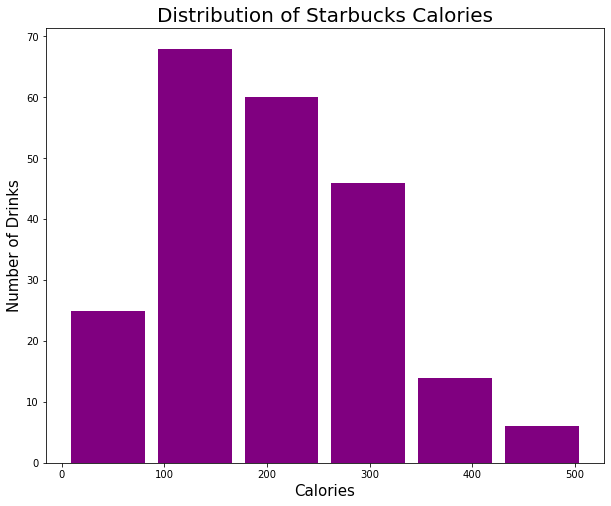

In [21]:
fig = plt.figure(figsize = (10, 8))
plt.hist(starbucks_data.Calories, bins = 6, rwidth= 0.85, color='purple')
plt.title('Distribution of Starbucks Calories', fontsize = 20)
plt.xlabel("Calories", fontsize = 15)
plt.ylabel("Number of Drinks", fontsize = 15)
plt.show()

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


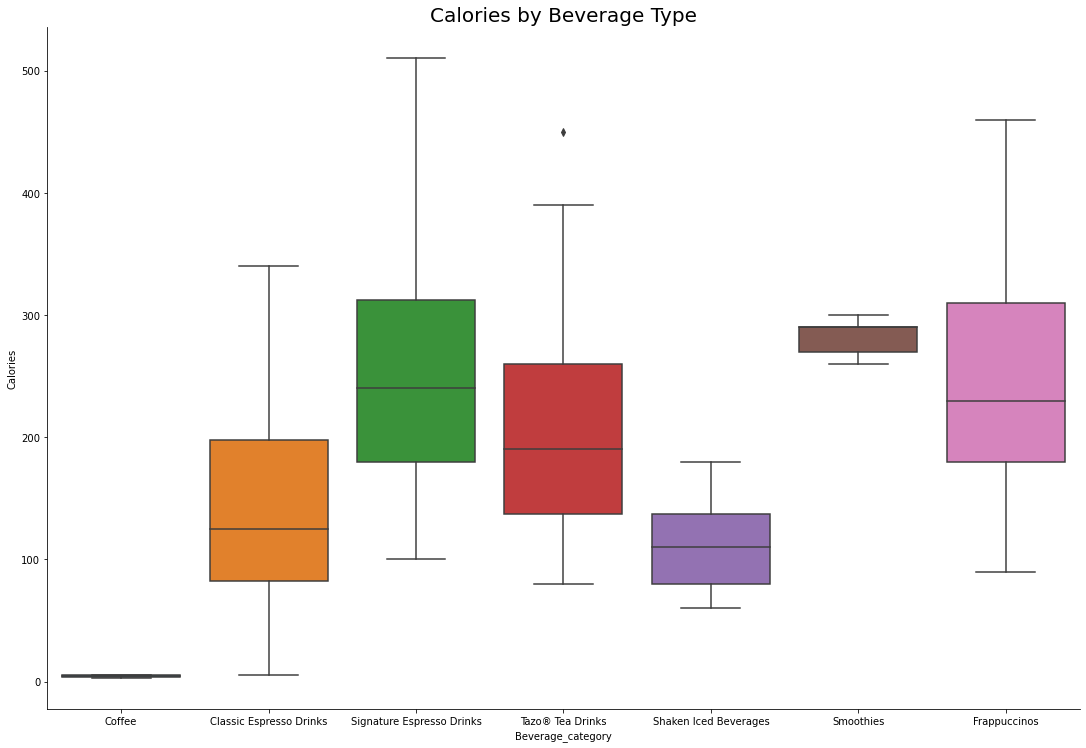

In [22]:
sns.catplot(x="Beverage_category", y="Calories",
            kind="box", data=starbucks_data, aspect=1.5, size = 10);
plt.title("Calories by Beverage Type", fontsize=20)
plt.show()

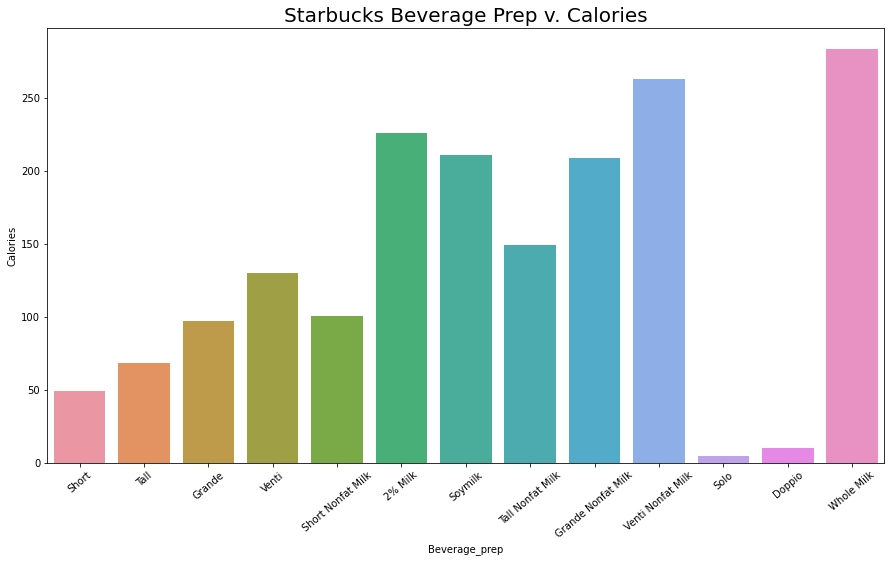

In [59]:
# data visualization to see the which Starbucks prep has the highest Calories
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage_prep", y="Calories", data=starbucks_data, ci=None)
plt.xticks(rotation=40)
plt.title("Starbucks Beverage Prep v. Calories", fontsize = 20)
plt.show()

In [23]:
starbucks_data.nlargest(5, 'Caffeine (mg)')[['Beverage', 'Caffeine (mg)']]

,Beverage,Caffeine (mg)
3,Brewed Coffee,410.0
2,Brewed Coffee,330.0
43,Caffè Americano,300.0
1,Brewed Coffee,260.0
156,Iced Brewed Coffee (With Classic Syrup),235.0


In [26]:
starbucks_data = starbucks_data.rename(columns={'Caffeine (mg)': 'Caffeine'})

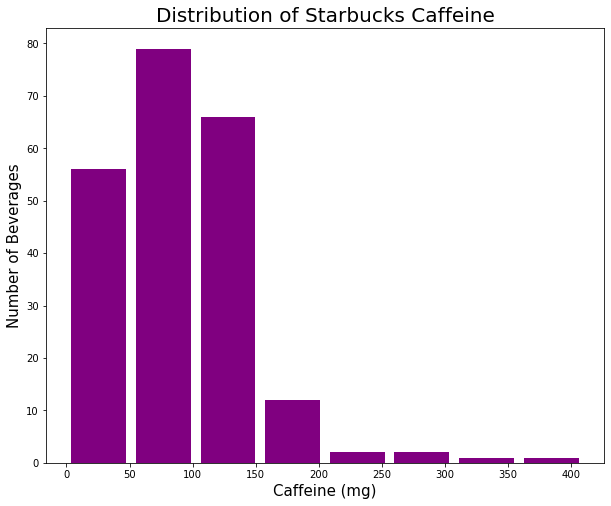

In [28]:
fig = plt.figure(figsize = (10, 8))
plt.hist(starbucks_data.Caffeine, bins = 8, rwidth= 0.85, color='purple')
plt.title('Distribution of Starbucks Caffeine', fontsize = 20)
plt.xlabel("Caffeine (mg)", fontsize = 15)
plt.ylabel("Number of Beverages", fontsize = 15)
plt.show()

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


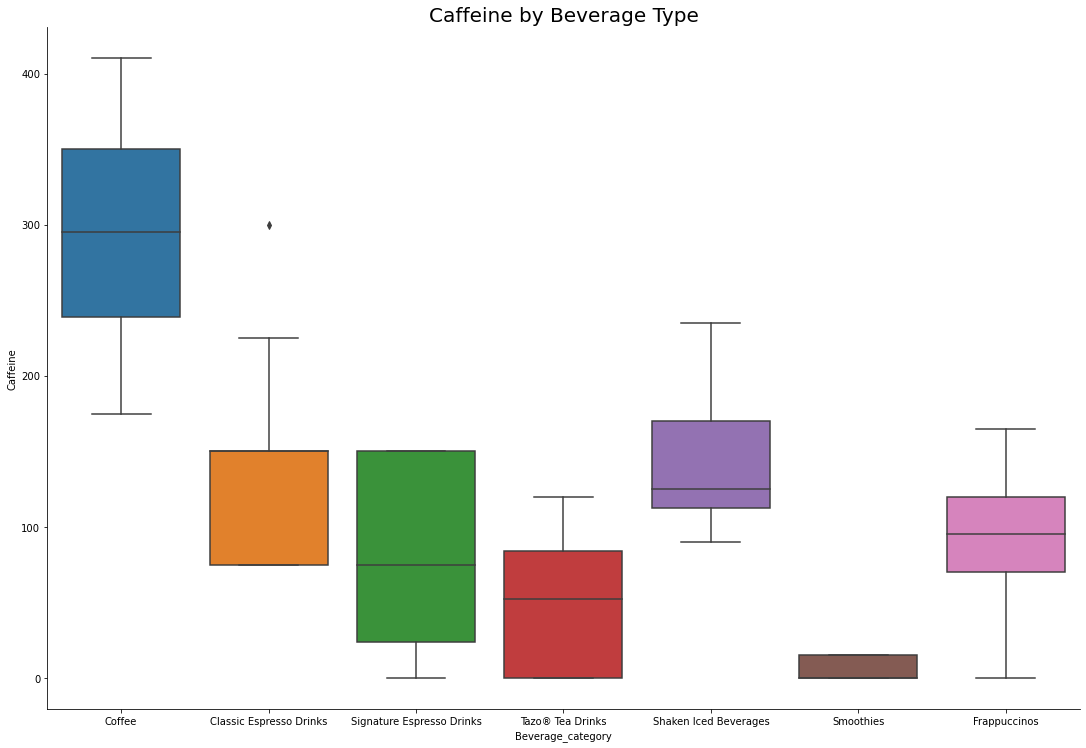

In [29]:
sns.catplot(x="Beverage_category", y="Caffeine",
            kind="box", data=starbucks_data, aspect=1.5, size = 10);
plt.title("Caffeine by Beverage Type", fontsize=20)
plt.show()

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


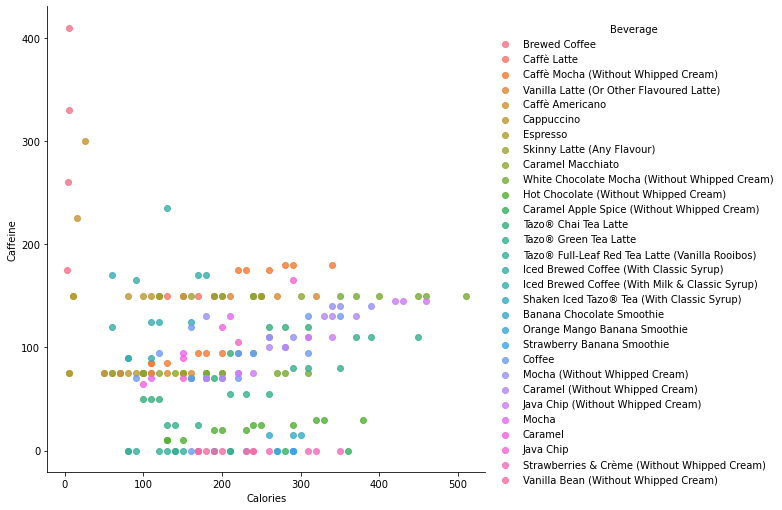

In [30]:
# Visualizing by beverage category
sns.lmplot(data = starbucks_data, x='Calories', y='Caffeine', fit_reg = False, hue = 'Beverage', size = 7, aspect = 1)

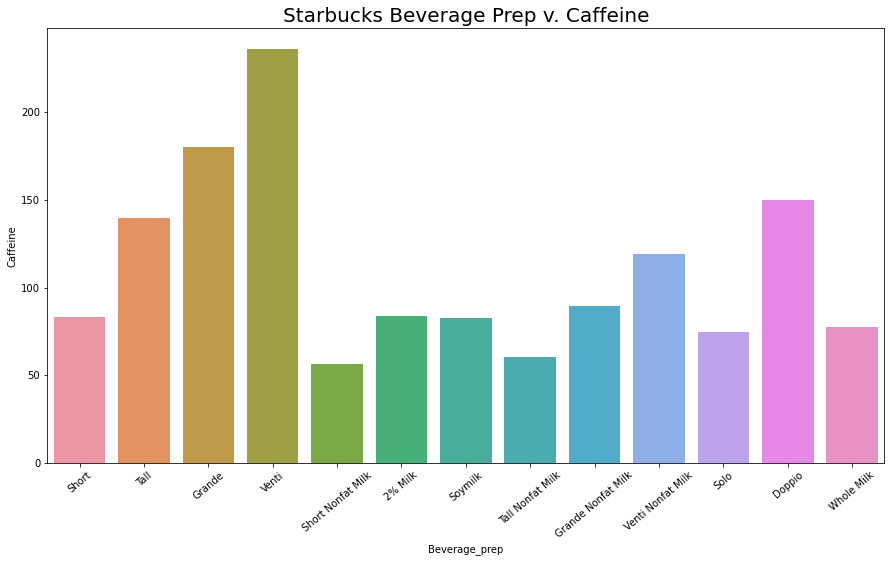

In [58]:
# data visualization to see the which Starbucks prep has the highest Caffeine
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage_prep", y="Caffeine", data=starbucks_data, ci=None)
plt.xticks(rotation=40)
plt.title("Starbucks Beverage Prep v. Caffeine", fontsize = 20)
plt.show()

In [35]:
starbucks_data.nlargest(5, 'Trans Fat (g) ')[['Beverage', 'Trans Fat (g) ']]

,Beverage,Trans Fat (g)
84,White Chocolate Mocha (Without Whipped Cream),9.0
81,White Chocolate Mocha (Without Whipped Cream),7.0
215,Java Chip (Without Whipped Cream),7.0
26,Caffè Mocha (Without Whipped Cream),6.0
78,White Chocolate Mocha (Without Whipped Cream),6.0


In [36]:
starbucks_data = starbucks_data.rename(columns={'Trans Fat (g) ': 'Fat'})

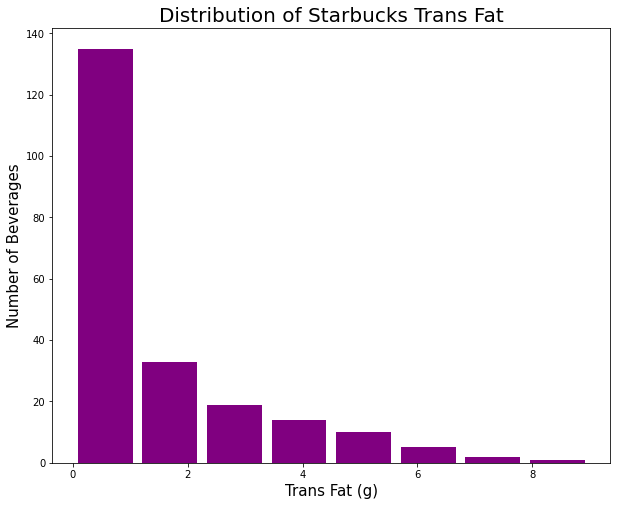

In [37]:
fig = plt.figure(figsize = (10, 8))
plt.hist(starbucks_data.Fat, bins = 8, rwidth= 0.85, color='purple')
plt.title('Distribution of Starbucks Trans Fat', fontsize = 20)
plt.xlabel("Trans Fat (g)", fontsize = 15)
plt.ylabel("Number of Beverages", fontsize = 15)
plt.show()

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


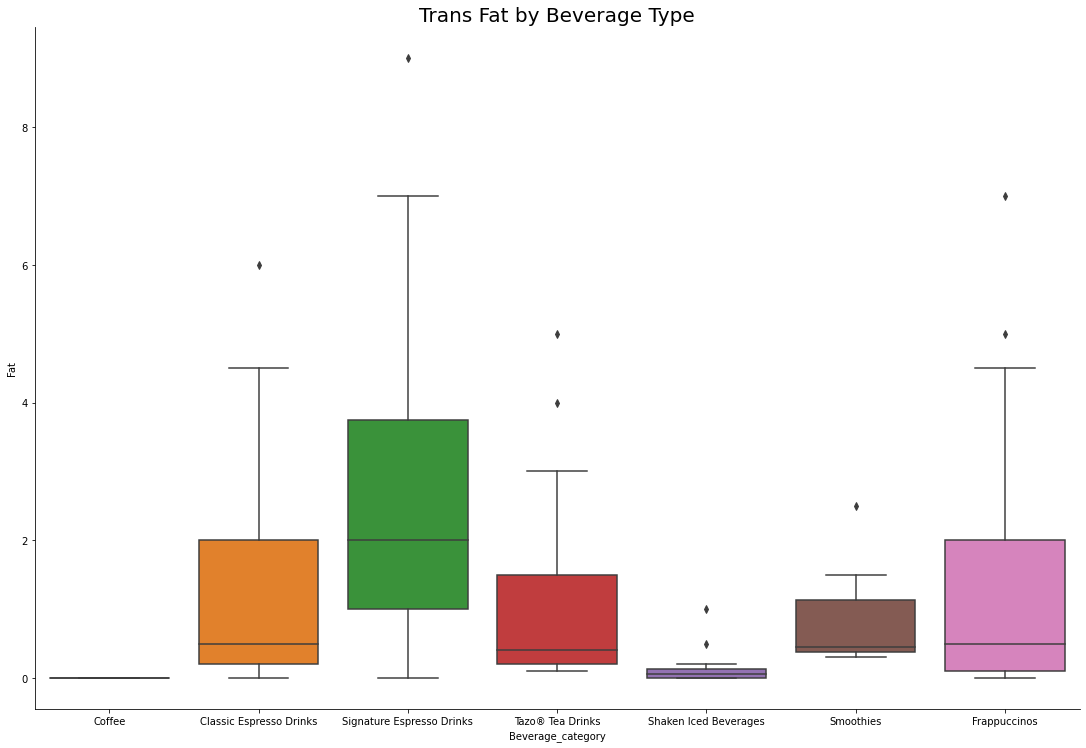

In [41]:
sns.catplot(x="Beverage_category", y="Fat",
            kind="box", data=starbucks_data, aspect=1.5, size = 10);
plt.title("Trans Fat by Beverage Type", fontsize=20)
plt.show()

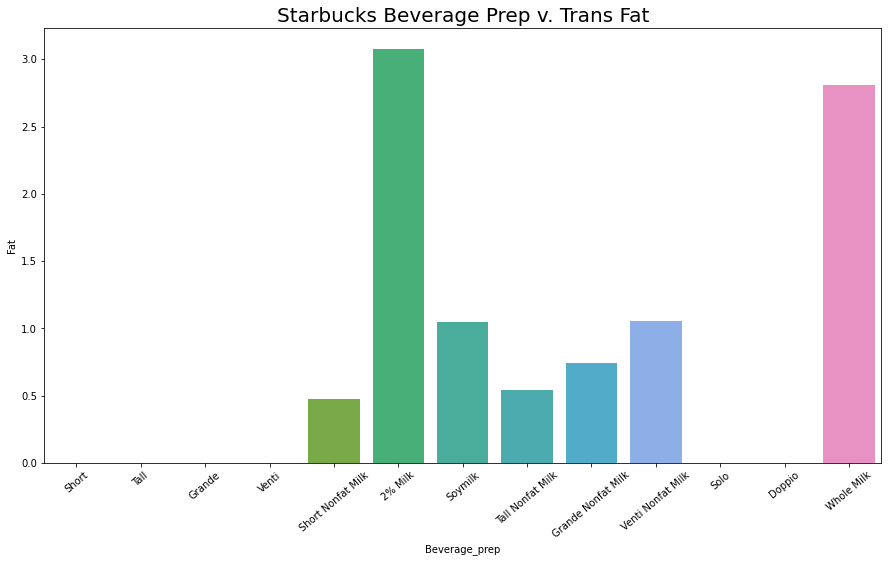

In [60]:
# data visualization to see the which Starbucks prep has the highest Trans Fat
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage_prep", y="Fat", data=starbucks_data, ci=None)
plt.xticks(rotation=40)
plt.title("Starbucks Beverage Prep v. Trans Fat", fontsize = 20)
plt.show()

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


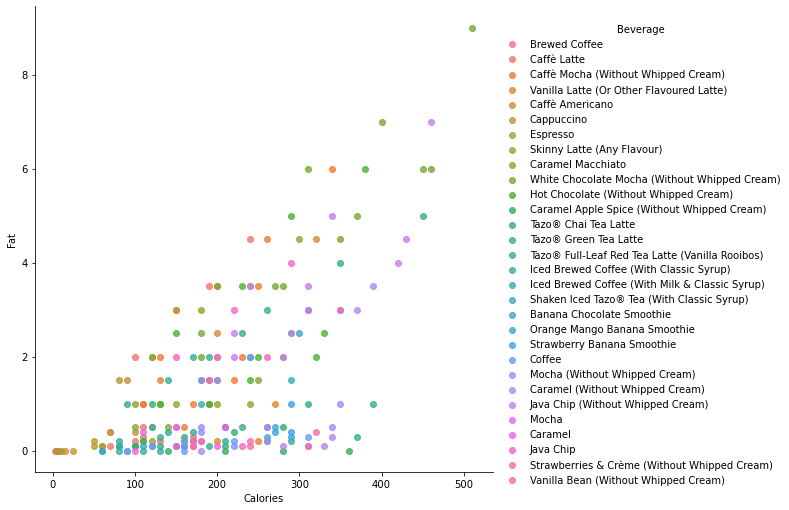

In [40]:
# Visualizing by beverage category
sns.lmplot(data = starbucks_data, x='Calories', y='Fat', fit_reg = False, hue = 'Beverage', size = 7, aspect = 1)

In [43]:
starbucks_data.nlargest(5, ' Sugars (g)')[['Beverage', ' Sugars (g)']]

,Beverage,Sugars (g)
214,Java Chip (Without Whipped Cream),84
215,Java Chip (Without Whipped Cream),84
101,Caramel Apple Spice (Without Whipped Cream),83
216,Java Chip (Without Whipped Cream),80
205,Caramel (Without Whipped Cream),77


In [47]:
starbucks_data = starbucks_data.rename(columns={' Sugars (g)': 'Sugar'})

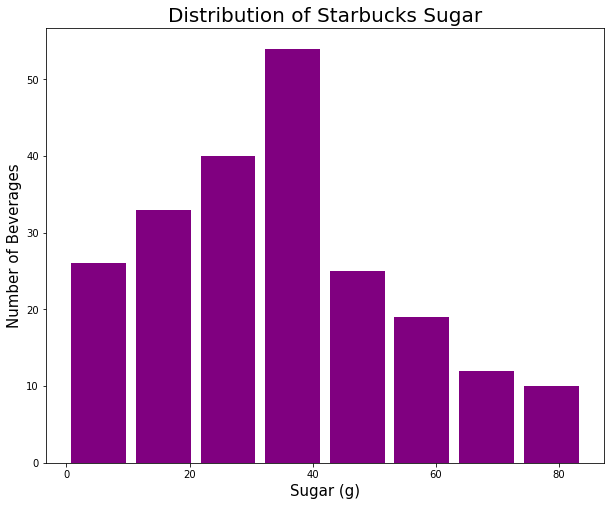

In [48]:
fig = plt.figure(figsize = (10, 8))
plt.hist(starbucks_data.Sugar, bins = 8, rwidth= 0.85, color='purple')
plt.title('Distribution of Starbucks Sugar', fontsize = 20)
plt.xlabel("Sugar (g)", fontsize = 15)
plt.ylabel("Number of Beverages", fontsize = 15)
plt.show()

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


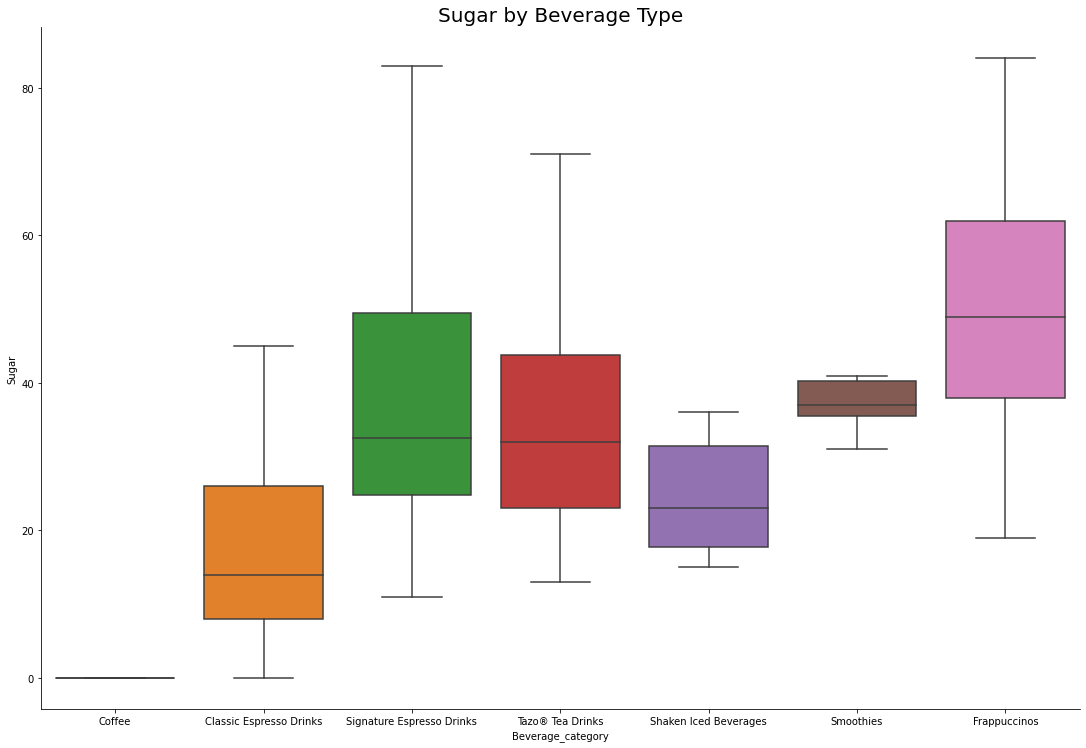

In [49]:
sns.catplot(x="Beverage_category", y="Sugar",
            kind="box", data=starbucks_data, aspect=1.5, size = 10);
plt.title("Sugar by Beverage Type", fontsize=20)
plt.show()

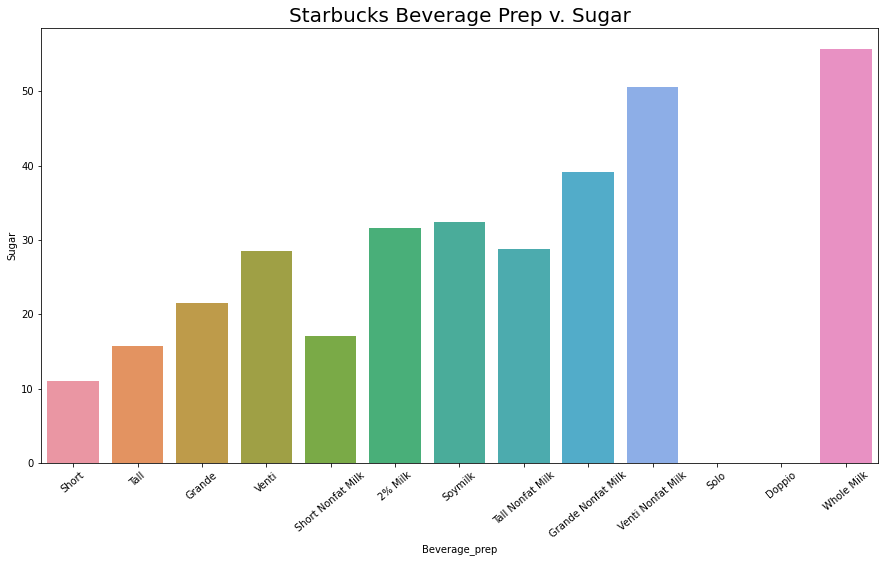

In [61]:
# data visualization to see the which Starbucks prep has the highest Calories
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage_prep", y="Sugar", data=starbucks_data, ci=None)
plt.xticks(rotation=40)
plt.title("Starbucks Beverage Prep v. Sugar", fontsize = 20)
plt.show()

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


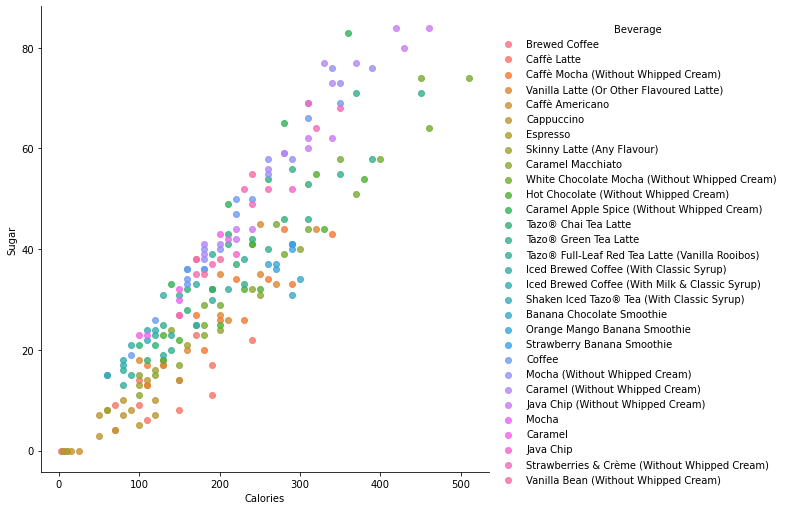

In [50]:
# Visualizing by beverage category
sns.lmplot(data = starbucks_data, x='Calories', y='Sugar', fit_reg = False, hue = 'Beverage', size = 7, aspect = 1)

## 5. Conclusion

There were 33 unique beverages within this dataset with 7 separate beverage categories (once we consolidated the different Frappuccino categories).

The beverage with the highest number of total calories was the White Chocolate Mocha (without Whipped Cream) at 510 total calories.  The histogram showed that most of the beverages were between 100 to 300 calories total.  The box plot showed that the Frappuccinos, smoothies, and signature espresso drinks have the highest median calories, while coffee, shaken iced beverages, and classic espresso drinks have the lowest median calories.  Additionally, with respect to how a beverage is prepared, drinks made with whole milk are more caloric.  It also makes sense that larger drinks (the “venti” size) have more calories than smaller drinks (the “short” size).

The beverage with the highest caffeine is brewed coffee at 410 mg of caffeine.  Most of the beverages within the dataset had between 0 and 150 mg of caffeine.  Coffee had the highest median caffeine, while smoothies had the lowest median caffeine.  The “doppio” beverage prep had the highest amount of caffeine, as the the venti size.  The short nonfat milk beverage prep had the lowest amount of caffeine.

White Chocolate Mocha (without whipped cream) had the highest amount of trans fat at 9.0 g.  Fortunately, most of the beverages within the dataset had trans fat between 0 and 2 g.  Signature Espresso Drinks had the highest median trans fat, while coffee and shaken iced beverages had the lowest median trans fat.  Additionally, drinks prepared with 2% milk and whole milk had the most trans fat.  It also appeared that there is a positive correlation between calories and trans fat, as the more calories a drink has the more trans fat is likely has.

Java Chip (without Whipped Cream) has the highest amount of sugar at 84 g.  Most of the Starbucks drinks were under 40 g of sugar.  Frappuccinos had the highest median sugar, whereas coffee and classic espresso drinks had the lowest median sugar.  Drinks prepared with whole milk had the most sugar as well.  Additionally, there was a positive correlation between sugar and calories, as drinks that were high calorie had more sugar.

My hypothesis was that there was a positive correlation between calories and trans fat, and based upon the above graphs, it appears that my hypothesis was correct.  There is a strong positive correlation between calories and trans fat.  I also did not believe there would be a positive correlation between calories and caffeine.  That was also correct, as it appears there is not a correlation at all between the two (the scatter plot looks more chaotic with no trend).